### Random forest applied to CWRU signals after data augmentation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_completo = pd.read_csv("estadisticosDatosAumentadosCWRU.csv" , sep = ',')

In [3]:
X = df_completo[['Kurtosis', 'Impulse factor', 'RMS', 'Margin factor', 'Skewness',
               'Shape factor', 'Peak to peak', 'Crest factor']].values
y = df_completo['Tipo'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state=0, stratify = y)

In [5]:
arr_estimators = range(1, 101)
scores_train = []
scores_test = []
for i in arr_estimators:
    randomForest = RandomForestClassifier(random_state=0, n_estimators = i, min_samples_split = 2, min_samples_leaf  = 1)
    randomForest.fit(X_train, y_train)
    scores_train.append(randomForest.score(X_train, y_train))
    scores_test.append(randomForest.score(X_test, y_test))
    if (i % 10 == 0 or i == 1):
        print('----- n trees: ' + str(i) + '----- Accuracy test: ' + str(scores_test[i - 1]) + '-----')

----- n trees: 1----- Accuracy test: 1.0-----
----- n trees: 10----- Accuracy test: 1.0-----
----- n trees: 20----- Accuracy test: 1.0-----
----- n trees: 30----- Accuracy test: 1.0-----
----- n trees: 40----- Accuracy test: 1.0-----
----- n trees: 50----- Accuracy test: 1.0-----
----- n trees: 60----- Accuracy test: 1.0-----
----- n trees: 70----- Accuracy test: 1.0-----
----- n trees: 80----- Accuracy test: 1.0-----
----- n trees: 90----- Accuracy test: 1.0-----
----- n trees: 100----- Accuracy test: 1.0-----


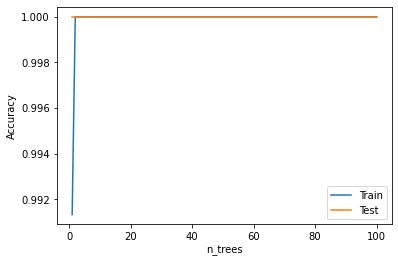

In [6]:
plt.figure()
plt.xlabel('n_trees')
plt.ylabel('Accuracy')
plt.plot(arr_estimators, scores_train, label = 'Train')
plt.plot(arr_estimators, scores_test, label = 'Test')
plt.legend()

In [7]:
randomForest = RandomForestClassifier(random_state=0, n_estimators = 20, min_samples_split = 2, min_samples_leaf  = 1)
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [8]:
target_names = ['Inner', 'Outer', 'Healthy']
pred = randomForest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, target_names = target_names))

[[33  0  0]
 [ 0 33  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00        33
       Outer       1.00      1.00      1.00        33
     Healthy       1.00      1.00      1.00        11

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [9]:
pred_train = randomForest.predict(X_train)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train, target_names = target_names))

[[99  0  0]
 [ 0 99  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

       Inner       1.00      1.00      1.00        99
       Outer       1.00      1.00      1.00        99
     Healthy       1.00      1.00      1.00        33

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

